In [8]:
__author__ = '@Tssp'
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import imageio as io
import matplotlib.animation as animation

# Free particle:
# $$\psi(x, t) = Ae^{i(\omega t - kx)} = Ae^{i(\hbar k^2 t/2m - kx)}$$
# Wave packet:
# $$\Psi(x, t) = \int^{\infty}_{-\infty} dk\ g(k)\psi(x,t)$$ 
# For a gaussian packet:
# $$\Psi(x, t)= \left( \frac{2a}{\pi} \right)^{1/4} \frac{e^{(-ax^2 + i(lx - \hbar l^2t/2m))/(1 + 2i\hbar at/m)}}{\sqrt{1 + 2i\hbar at/m}}$$

In [9]:
def wave_packet(a, l, hbar, t, m, x):
    out = (2*a/np.pi)**(1/4) * np.exp((-a*x**2 + 1j*(l*x-hbar*l**2*t/(2*m))) / (1 + 2j*hbar*a*t/m)) / np.sqrt(1 + 2j*hbar*a*t/m)
    return out
def Prob(Psi):
    return np.conj(Psi) * Psi

# Animation

In [10]:
x = np.linspace(-5, 20, 300)
a = 0.1
l=3
hbar = 5
m = 1

In [11]:
def init():
    ax.set_xlim(-5, 20)
    ax.set_ylim(-0.6, 0.6)
    ax.set_xlabel('$X$', fontsize=18)
    ax.set_ylabel('$\Psi(x,t)$', fontsize=18)
    plt.tight_layout()
    plt.legend(['Onda', 'Probabilidad'], loc='upper right', frameon=False)
    plt.axis('off')
    return ln,

In [12]:
def update(frame):
    xdata.append(frame)
    ydata = wave_packet(a, l, hbar, frame, m, x)
    ydata2 = Prob(ydata)
    ln.set_data(x, ydata)
    ln2.set_data(x, ydata2)
    return ln,

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


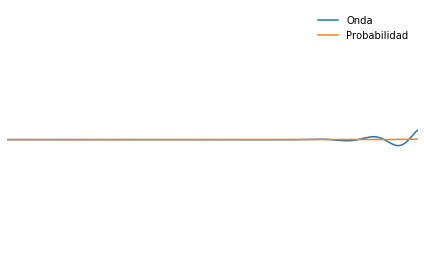

In [13]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [])
ln2, = plt.plot([], [])

ani = animation.FuncAnimation(fig, update, frames=np.linspace(-2, 2, 120),
                    init_func=init, blit=True, interval = 100)

ani.save(f'Wavepacketv2.gif', writer='imagemagick', dpi=200)
plt.show()